# Simulation du paradoxe des anniversaires

On se propose d'effctuer une simulation du paradoxe des anniversaire dans le cas d'un groupe de 30 personnes.

L'énoncé peut se résumer de la manière suivante : **on prend 30 personnes au hasard dans la population, quelle est la probabilité qu'au moins deux personnes aient la même date d'anniversaire**

On supposera qu'il y a 365 jours par an et que la répartition des dates d'anniversaire dans l'année suit une loi uniforme (chaque jour a une probabilité $\frac{1}{365}$ de tomber).

In [1]:
from math import factorial
from random import randint
from itertools import combinations

import matplotlib.pyplot as plt
%matplotlib inline

## 1. échantillon

La première étape consiste à modéliser le tirage de 30 personnes dans une population. On le modélise avec une liste de 30 nombres tirés au hasard.

In [2]:
def echantillon():
    return [randint(1, 365) for _ in range(30)]

In [3]:
exemple = echantillon()
print("Exemple:", ','.join(map(str, exemple)))

Exemple: 82,52,224,295,266,193,13,363,14,290,86,253,276,289,64,142,249,208,241,97,362,350,291,20,47,60,232,191,148,22


Comme il n'est pas très facile de lire cela, on va supposer que cela ne change rien si on trie cette liste

In [4]:
def echantillon_trie():
    return sorted([randint(1, 365) for _ in range(30)])

In [5]:
exemple = echantillon_trie()
print("Exemple:", ','.join(map(str, exemple)))

Exemple: 8,19,59,65,69,72,75,84,101,105,118,133,165,185,196,198,218,232,247,267,282,287,309,309,310,321,326,327,327,338


## 2. anniversaires

Maintenant, il s'agit de regarder, sur un échantillon obtenu, de voir si 2 personens du groupe ont la même date d'anniversaire. Dans notre modèle, cela revient à regarder si deux éléments de la liste ont la même valeur.

In [6]:
def anniversaire(liste):
    for p1, p2 in combinations(liste, 2):  # toutes les combinaisons de deux éléments pris dans la liste
        if p1 == p2:
            return True  # si à un moment je trouve un p2 égal à un p1
    return False

### Note d'optimisation

Si on veut faire ça de manière plus propore, on va éviter de faire autant de comparaison. On n'a même pas vraiment besoin d'un parcours de la liste. Un exemple (parmis d'autres) ci-dessous :

In [7]:
def anniversaire(liste):
    return len(set(liste)) != len(liste)

### Test

Pour vérifier que notre fonction fait bien le travail, testons cela sur quelques exemple.

In [8]:
for _ in range(5):
    e = echantillon_trie()
    a = anniversaire(e)
    print(f"Exhantillon: {e}, anniversaires ? {a}\n")

Exhantillon: [18, 28, 41, 50, 54, 55, 55, 76, 78, 90, 128, 151, 154, 168, 168, 176, 197, 205, 213, 215, 221, 228, 228, 247, 313, 322, 328, 329, 338, 339], anniversaires ? True

Exhantillon: [19, 31, 32, 60, 66, 73, 76, 91, 96, 105, 118, 124, 138, 160, 167, 175, 185, 209, 217, 217, 228, 230, 291, 291, 322, 324, 325, 338, 339, 356], anniversaires ? True

Exhantillon: [5, 5, 15, 18, 18, 63, 63, 67, 69, 103, 107, 109, 125, 153, 160, 169, 183, 186, 189, 194, 218, 218, 245, 246, 262, 278, 326, 335, 349, 363], anniversaires ? True

Exhantillon: [31, 42, 43, 64, 76, 86, 89, 97, 100, 161, 212, 214, 232, 239, 250, 257, 258, 262, 270, 292, 300, 325, 326, 342, 342, 344, 346, 350, 352, 353], anniversaires ? True

Exhantillon: [5, 7, 42, 52, 52, 53, 57, 87, 93, 94, 98, 104, 112, 147, 149, 150, 150, 173, 178, 189, 190, 214, 230, 277, 291, 304, 334, 336, 338, 347], anniversaires ? True



## 2. simulations

Maintenant, pour évaluer la 'probabilité', on va effectuer un grand nombre de simulations, et regarder quelle est la fréquence d'apparition de l'événement '2 personnes ont leur anniversaire en commun'

In [11]:
def simulation(n_sim):
    success = 0
    frequences = []
    for i in range(n_sim):
        if anniversaire(echantillon_trie()):
            success += 1
        frequences.append(success/(i+1))
    print(f"Nb de succès:{success}, ratio:{success/n_sim:.2%}")
    return success, frequences

In [20]:
s, f = simulation(2000)

Nb de succès:1417, ratio:70.85%


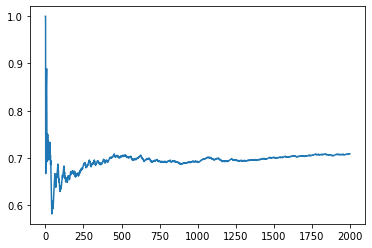

In [21]:
plt.plot(f)

In [22]:
print(f"Fréquence finale: {f[-1]:.2%}")

Fréquence finale: 70.85%
